Demonstrate the Logistic Regression API. We will use text data to do a binary classification task.
1. Create Count Matrix
2. Build Logitic Regression Model
3. Apply Regularization
4. Do grid search to tune regularization terms

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# data_dir="E:\Work\Machine Learning Course\Python\Module 3 Logistic Regression\Data"
# os.chdir(data_dir)

We have a tab-separated dataset

In [2]:
review_data=pd.read_table('movie_reviews.tsv',sep="\t")

In [3]:
review_data.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


Dataset about movie reviews. We have a label for each reviews. 1-reviewer thought the movie was good. 0-reviewer thought the movie was not that great.

Build a classifier to predict if a reviewer will like a movie(1) or not(0)

In [4]:
review_data.isnull().sum()

id           0
sentiment    0
review       0
dtype: int64

In [5]:
review_data.dtypes

id           object
sentiment     int64
review       object
dtype: object

In [6]:
review_data['sentiment'].describe()

count    25000.00000
mean         0.50000
std          0.50001
min          0.00000
25%          0.00000
50%          0.50000
75%          1.00000
max          1.00000
Name: sentiment, dtype: float64

median shows 50%. So count of 1s and 0s are 50-50

In [7]:
review_data.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


Converting text to a predictor matrix. We use a common technique - A Term-document matrix refers to the count of each word in each row of data

### Creating text features

<img src='dtm.png'>

To illustrate with an example:

In [8]:
## Creating Features
demo_text=["This is sentence one.", "This is sentence two.", "This is a very very long sentence three."]
demo_text

['This is sentence one.',
 'This is sentence two.',
 'This is a very very long sentence three.']

Creating a TD matrix for these 3 sentences

In [9]:
import sklearn.feature_extraction.text as text

Instantiate a count vectorizer. Use fit_transform to convert the list into a matrix of count of each word in the sentences in the list. 

In [10]:
cv=text.CountVectorizer(demo_text)
count_matrix=cv.fit_transform(demo_text)
cv.get_feature_names()

C:\Users\Swastik\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass input=['This is sentence one.', 'This is sentence two.', 'This is a very very long sentence three.'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


['is', 'long', 'one', 'sentence', 'this', 'three', 'two', 'very']

In [11]:
count_matrix.toarray()

array([[1, 0, 1, 1, 1, 0, 0, 0],
       [1, 0, 0, 1, 1, 0, 1, 0],
       [1, 1, 0, 1, 1, 1, 0, 2]], dtype=int64)

1st rows represents the word count for 1st list - 1-'is',0-'long', 1-'one' and so on. there's no 'long' in the first sentence right? 'very' occurs twice in the last sentence

another way to represent count array is to convert into a Dataframe

In [12]:
pd.DataFrame(count_matrix.toarray(),columns=cv.get_feature_names())

,is,long,one,sentence,this,three,two,very
0,1,0,1,1,1,0,0,0
1,1,0,0,1,1,0,1,0
2,1,1,0,1,1,1,0,2


Now lets create TD matrix for the reviews column

Remember - always pass text data as a list. We will also put a threshold on the max columns that can be created in the data. With text data you have many unique words and creating a count data could end up with many columns - lots of computation when building the model. Sklearn gives the ability to put a threshold on the max number of columns in the count matrix. (to figure out a good number you will have to experiment with data to see at what number your system is able to build the model - here 5000 works well)

In [13]:
## Create Features for the linear classifier 
cv=text.CountVectorizer(review_data['review'].tolist(),max_features = 5000)
X=cv.fit_transform(review_data['review'])
X.shape

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(25000, 5000)

In [14]:
y=review_data['sentiment']

In [15]:
import sklearn.model_selection as model_selection
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2,random_state=200)

In [16]:
import sklearn.linear_model as linear_model
clf=linear_model.LogisticRegression()

In [17]:
mod=clf.fit(X,y)

C:\Users\Swastik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
mod.predict_proba(X_test)

array([[5.82166488e-01, 4.17833512e-01],
       [9.99059043e-01, 9.40957389e-04],
       [9.99997398e-01, 2.60175993e-06],
       ...,
       [1.93579824e-03, 9.98064202e-01],
       [9.99797928e-01, 2.02072115e-04],
       [9.99815539e-01, 1.84460775e-04]])

You get two probabilities corresponding to class 0 and 1. Which corresponds to what, take a look at .classes_

In [19]:
mod.classes_

array([0, 1], dtype=int64)

Sequence is [0,1] so first column correponds to probabilities for class 0 and the second for class 1

#### Logistic Regression API

<img src="api.png">

#### Regularization in sklearn API

Regularized Cost Function, l2 norm = $-\sum_{1}^{n} [y_i log(p_i)+(1-y_i)log(1-p_i)]+\frac{1}{C}\beta^2$, here $\frac{1}{C}=\lambda$

Regularized Cost Function, l1 norm = $-\sum_{1}^{n}[ y_i log(p_i)+(1-y_i)log(1-p_i)]+\frac{1}{C}|\beta|$, here $\frac{1}{C}=\alpha$

Logistic Regression models can be regularized. If we look at the shape of predictor matrix - 25000 rows and 5000 columns. If we use all 5000 columns, there are chances we might overfit our model. So we need to introduce some sort of regularization

to figure out what would be the regularizing parameter, we do a GridSearch. 

Since the dataset is quite large, doing an extensive gridsearch will be computationally expensive so just for the demonstration, lets do a gridsearch for two random values for parameter 'C'. 
sklearn treats reg parameters differently - instead of lambda, scikit uses 1/c. 1/c in sklearn doc is = lambda that is higher values of c for lower values of lambda. and penalty-we give L2

In [20]:
np.random.seed(300)
mod=model_selection.GridSearchCV(clf,param_grid={"penalty":["l2"],"C":np.random.uniform(0,120,2)})
mod.fit(X_train,y_train)

C:\Users\Swastik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Swastik\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([54.13470824, 26.52268101]),
                         'penalty': ['l2']})

In [21]:
mod.best_estimator_

LogisticRegression(C=26.522681005625447)

best estimator is a logistic regression model with c=26.52 which means lambda would be 1/26.52

In [22]:
## accuracy score
mod.best_score_

0.859

In [23]:
mod.predict_proba(X_test)

array([[1.94847632e-01, 8.05152368e-01],
       [9.99969759e-01, 3.02409103e-05],
       [9.99999751e-01, 2.49350273e-07],
       ...,
       [1.48111467e-03, 9.98518885e-01],
       [9.99637871e-01, 3.62129420e-04],
       [9.99918056e-01, 8.19442322e-05]])

In [24]:
import sklearn.metrics as metrics

Roc curve - we pass actuals with predicted probs of class 1

In [25]:
metrics.roc_curve(y_test,mod.predict_proba(X_test)[:,1])

(array([0.        , 0.        , 0.        , ..., 0.96233148, 0.96233148,
        1.        ]),
 array([0.00000000e+00, 8.07102502e-04, 1.93704600e-02, ...,
        9.99596449e-01, 1.00000000e+00, 1.00000000e+00]),
 array([2.00000000e+00, 1.00000000e+00, 9.99999998e-01, ...,
        1.22708145e-08, 1.20172883e-08, 2.65980879e-25]))

1st array talks about fpr, second about tpr, third talks about the thresholds at which the above fprs and tprs are computed

store fpr, tpr and threshold into objects

In [26]:
fpr,tpr,thresholds=metrics.roc_curve(y_test,mod.predict_proba(X_test)[:,1])

Text(0, 0.5, 'true positive rate')

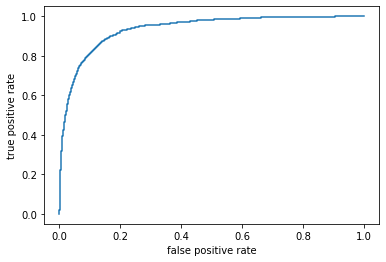

In [27]:
plt.plot(fpr,tpr,"-")
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')

Looks to be doing a good job than a naive classifier - the curve is at the top left

In [28]:
metrics.roc_auc_score(y_test,mod.predict_proba(X_test)[:,1])

0.9360811301227165

In [29]:
metrics.confusion_matrix(y_test,mod.predict(X_test))

array([[2172,  350],
       [ 316, 2162]], dtype=int64)

In [30]:
print(metrics.classification_report(y_test,mod.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      2522
           1       0.86      0.87      0.87      2478

    accuracy                           0.87      5000
   macro avg       0.87      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000

